In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use(['fivethirtyeight'])
mpl.rcParams['lines.linewidth'] = 3
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
nyc=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', header=0,sep=',',parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],index_col='Unique Key')

In [7]:
def prepareData(nyc):
    nyc['Resolution Action Updated Date'] = (nyc['Closed Date'] - nyc['Created Date']).dt.total_seconds() ####days/3600
    nyc_clean=nyc[nyc['Resolution Action Updated Date'].notnull()]
    nyc_perfect = nyc_clean[nyc_clean['Closed Date'] >= nyc_clean['Created Date']]
    nyc_perfect['Day of Week'] = nyc_perfect['Created Date'].dt.dayofweek
    nyc_perfect['Day of Month'] = nyc_perfect['Created Date'].dt.day
    nyc_perfect['Month'] = nyc_perfect['Created Date'].dt.month
    nyc_perfect['Year'] = nyc_perfect['Created Date'].dt.year
    nyc_perfect=nyc_perfect[nyc_perfect.Borough!='Unspecified']
    return nyc_perfect

In [8]:
nyc_perfect = prepareData(nyc)
nyc_perfect.shape

(361542, 56)

<AxesSubplot:title={'center':'Most common Complaints'}>

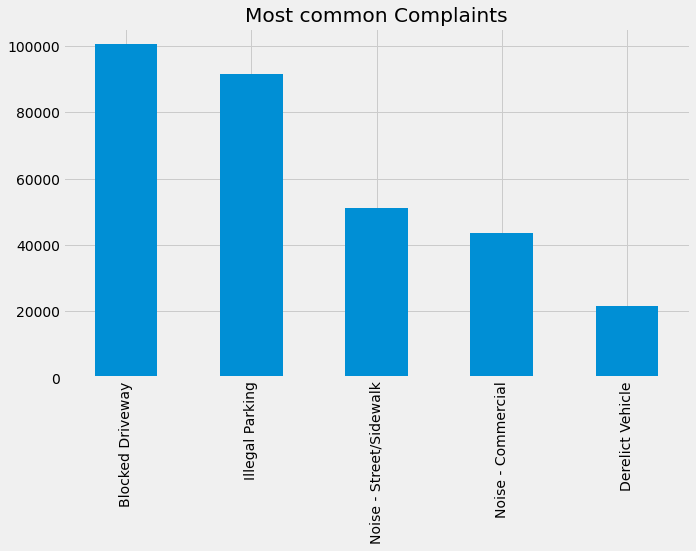

In [9]:
(nyc_perfect['Complaint Type'].value_counts()).head().plot(kind='bar',
                    figsize=(10,6), title = 'Most common Complaints')

<AxesSubplot:title={'center':'Least frequent Complaints'}>

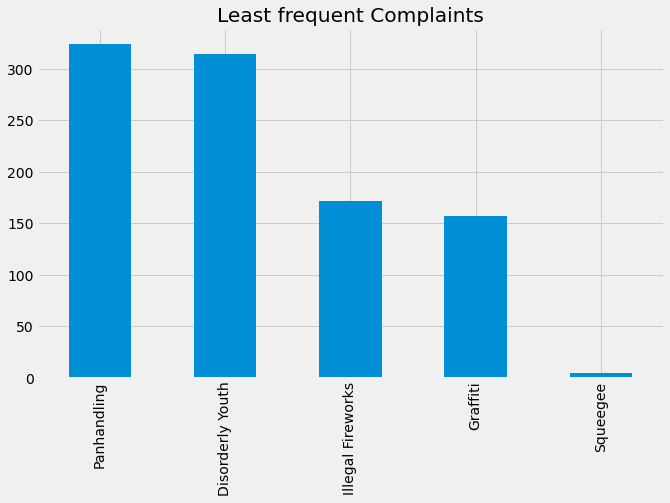

In [10]:
(nyc_perfect['Complaint Type'].value_counts()).tail().plot(kind='bar',
                    figsize=(10,6), title = 'Least frequent Complaints')

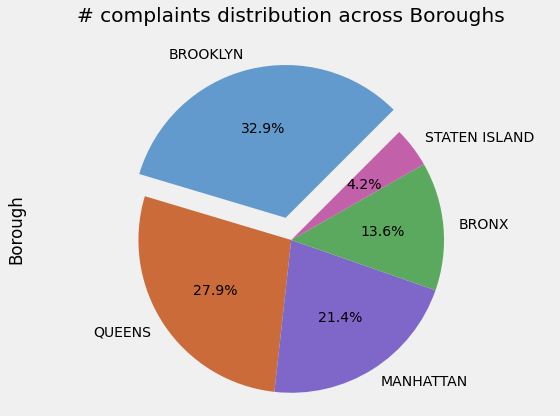

In [11]:
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
nyc_perfect['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
#plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('# complaints distribution across Boroughs\n')
plt.tight_layout()
plt.show()

In [12]:
nyc_Brooklyn = nyc_perfect[nyc_perfect['Borough']=='BROOKLYN']

In [13]:
nyc_Brooklyn.shape

(118851, 56)

<AxesSubplot:title={'center':'Most Frequent Complaints in Brooklyn'}>

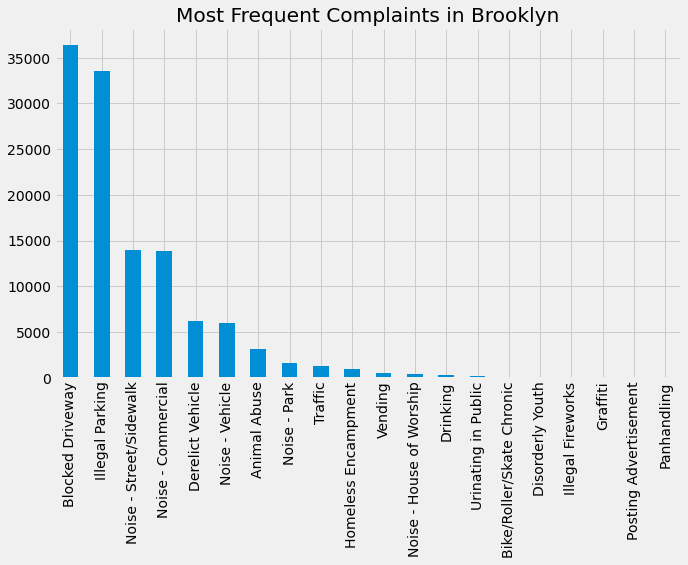

In [14]:
(nyc_Brooklyn['Complaint Type'].value_counts()).head(25).plot(kind='bar',figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

<AxesSubplot:title={'center':'Location Type vs # Complaints'}>

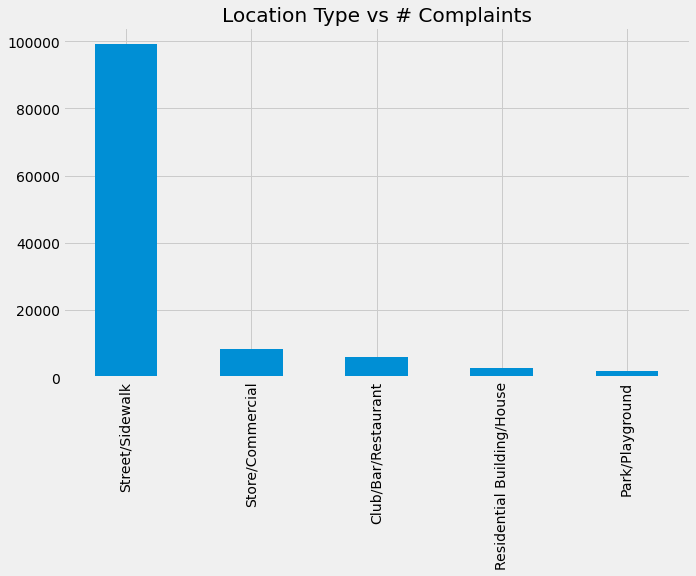

In [15]:
(nyc_Brooklyn['Location Type'].value_counts()).head().plot(kind='bar',figsize=(10,6),title = 'Location Type vs # Complaints')

In [16]:
nyc_perfect[nyc_perfect['Complaint Type'] == 'Blocked Driveway']['Descriptor'].value_counts()

No Access         75657
Partial Access    24882
Name: Descriptor, dtype: int64

In [17]:
nyc_Brook_blocked = nyc_Brooklyn[nyc_Brooklyn['Complaint Type'] == 'Blocked Driveway']

(-74.04994269716303, -73.84653003063751, 40.56459183795005, 40.746496092182724)

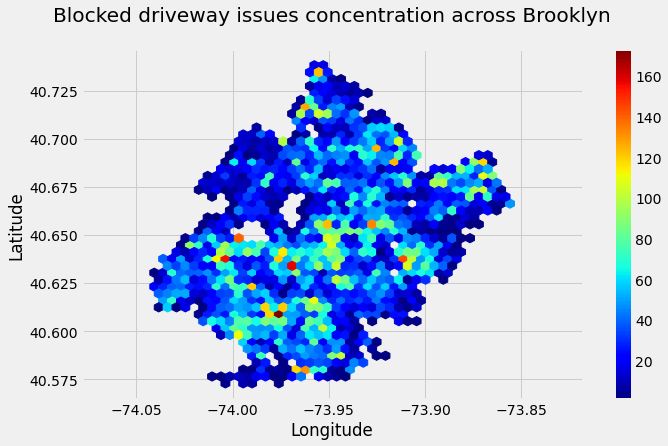

In [18]:
nyc_Brook_blocked.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,title = 'Blocked driveway issues concentration across Brooklyn\n',colormap='jet', mincnt=1, figsize=(10,6)).axis('equal')

<AxesSubplot:title={'center':'Volume of Blocked driveway issues by Month\n'}>

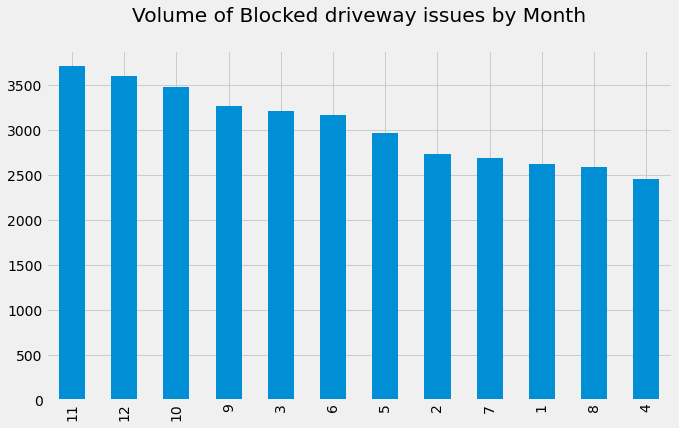

In [19]:
nyc_Brook_blocked['Month'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Blocked driveway issues by Month\n')

In [24]:
nyc_avg_res_time_city = nyc_perfect.groupby(['City','Complaint Type']).Resolution_Time.mean()
#nyc_perfect.sort_values('Complaint Type').groupby('City')
#
nyc_avg_res_time_city.head(25)

AttributeError: 'DataFrameGroupBy' object has no attribute 'Resolution_Time'